In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calls = pd.read_csv("911.csv")
calls.timeStamp = pd.to_datetime(calls.timeStamp)

In [2]:
 t = calls.title.str.extract("(\w*)([:\s])(\s\w*[\s-]?[/]?\w*/?\w*)",expand = False)

In [3]:
calls["call_type"] = t[0]
calls["call_detail"] = t[2]

In [4]:
calls["Month"] = calls.timeStamp.dt.month
calls["Year"] = calls.timeStamp.dt.year
calls["Hour"] = calls.timeStamp.dt.hour
calls["weekday"] = calls.timeStamp.dt.weekday_name

In [5]:
calls["hour_type"] = np.where(calls.Hour < 5,"MidNight",
                              np.where((calls.Hour >=5)& (calls.Hour <12),"Morning",
                                                                np.where((calls.Hour >=12) &(calls.Hour <17),"AfterNoon","Evening")))

In [6]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,call_detail,Month,Year,Hour,weekday,hour_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,2015,17,Thursday,Evening
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,2015,17,Thursday,Evening
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,2015,14,Thursday,AfterNoon
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,2015,16,Thursday,AfterNoon
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,2015,16,Thursday,AfterNoon


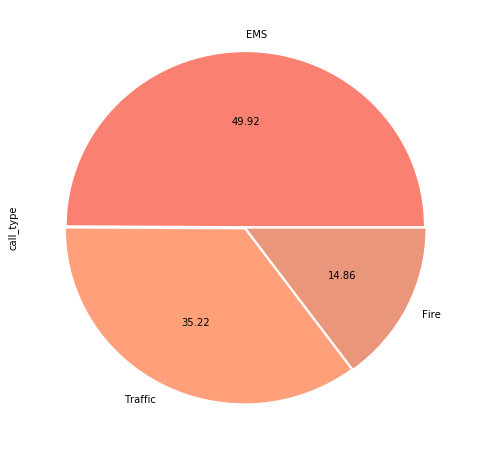

In [58]:
calls.call_type.value_counts().plot(kind = "pie", colors =["salmon","lightsalmon","darksalmon"],
                                    autopct = "%.2f", figsize = (8,8),
                                   explode = [0.01,0.01,0.01])

### Emergency Calls

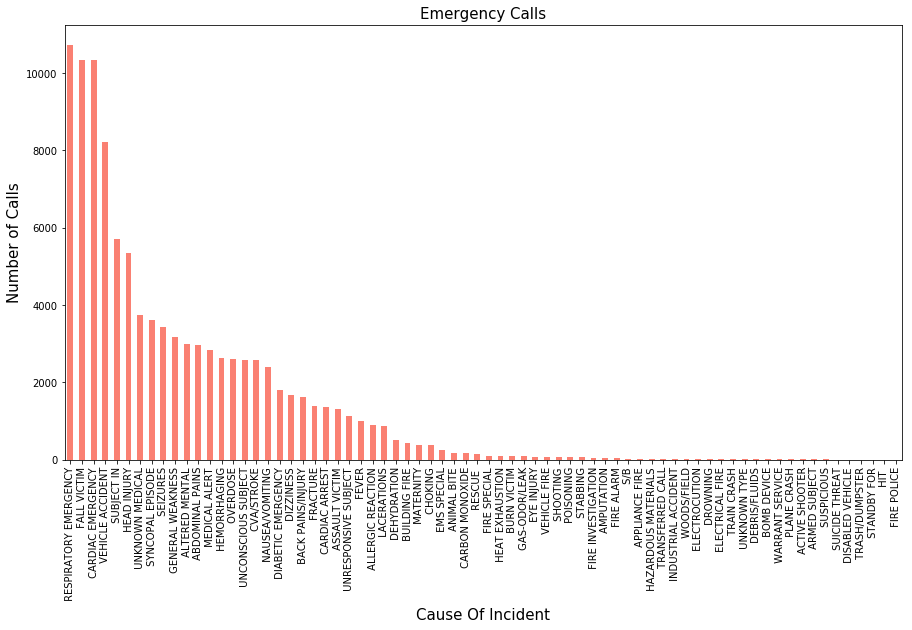

In [8]:
calls[calls.call_type == "EMS"].call_detail.value_counts().plot(kind = "bar", figsize = (15,8), color = "salmon")
plt.xlabel("Cause Of Incident", size =15)
plt.ylabel("Number of Calls", size = 15)
plt.title("Emergency Calls", size = 15)

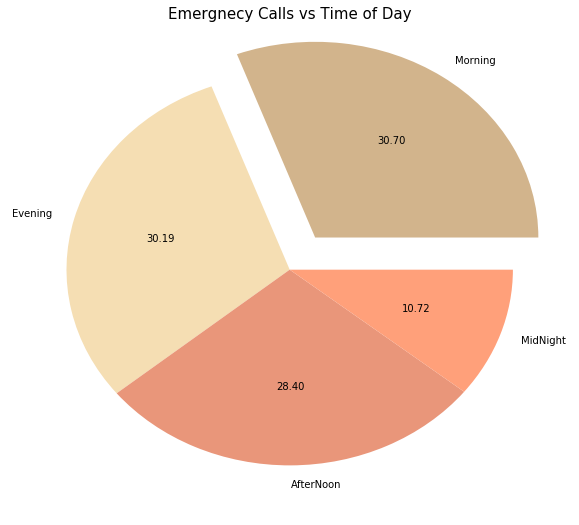

In [9]:
calls[calls.call_type == "EMS"].hour_type.value_counts().plot(figsize = (10,9),kind = "pie",autopct = "%.2f", colors = ["tan", "wheat","darksalmon","lightsalmon"],
                                                             explode = [0.2,0,0,0])
plt.ylabel("")
plt.title("Emergnecy Calls vs Time of Day", size = 15)

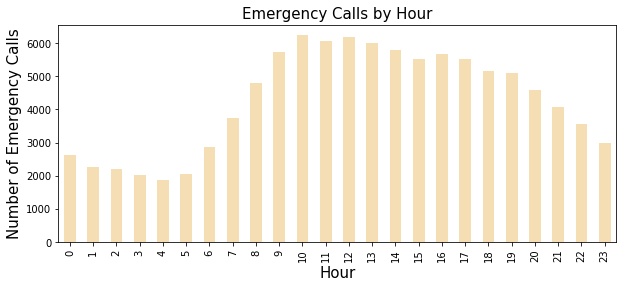

In [10]:
calls[calls.call_type=="EMS"].Hour.value_counts().sort_index().plot(kind = "bar", figsize = (10,4), color = "wheat")
plt.xlabel("Hour", size = 15)
plt.ylabel("Number of Emergency Calls", size =15)
plt.title("Emergency Calls by Hour", size = 15)

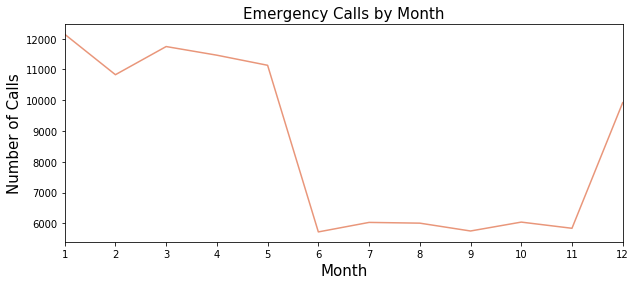

In [11]:
calls[calls.call_type == "EMS"].Month.value_counts().sort_index().plot(kind = "line", color = "darksalmon", figsize =(10,4))
plt.xticks(range(1,13,1));
plt.title("Emergency Calls by Month", size =15);
plt.xlabel("Month", size = 15);
plt.ylabel("Number of Calls", size = 15);


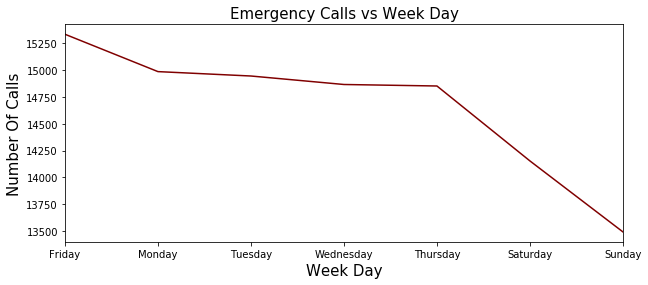

In [12]:
calls[calls.call_type == "EMS"].weekday.value_counts().plot(kind = "line", color = "maroon", figsize = (10,4));
plt.title("Emergency Calls vs Week Day", size =15);
plt.xlabel("Week Day", size =15);
plt.ylabel("Number Of Calls", size = 15);

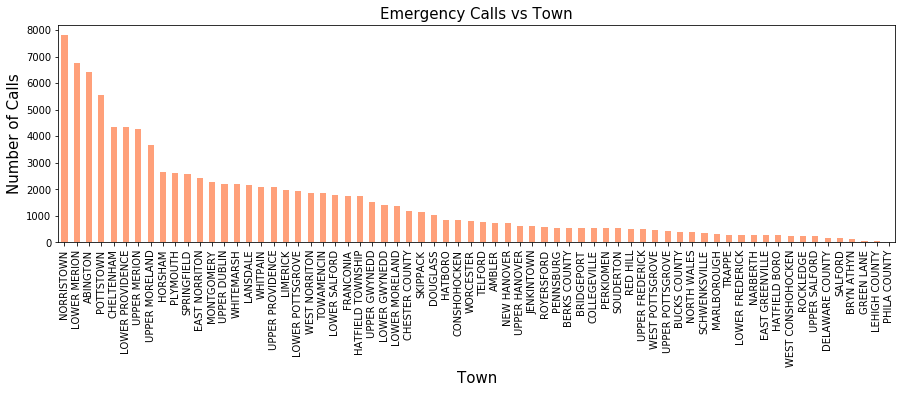

In [13]:
calls[calls.call_type =="EMS"].groupby("twp").count().e.sort_values(ascending = False).plot(kind = "bar", figsize= (15,4), color = "lightsalmon");
plt.title("Emergency Calls vs Town", size = 15)
plt.xlabel("Town", size = 15);
plt.ylabel("Number of Calls", size = 15);

### Traffic Calls

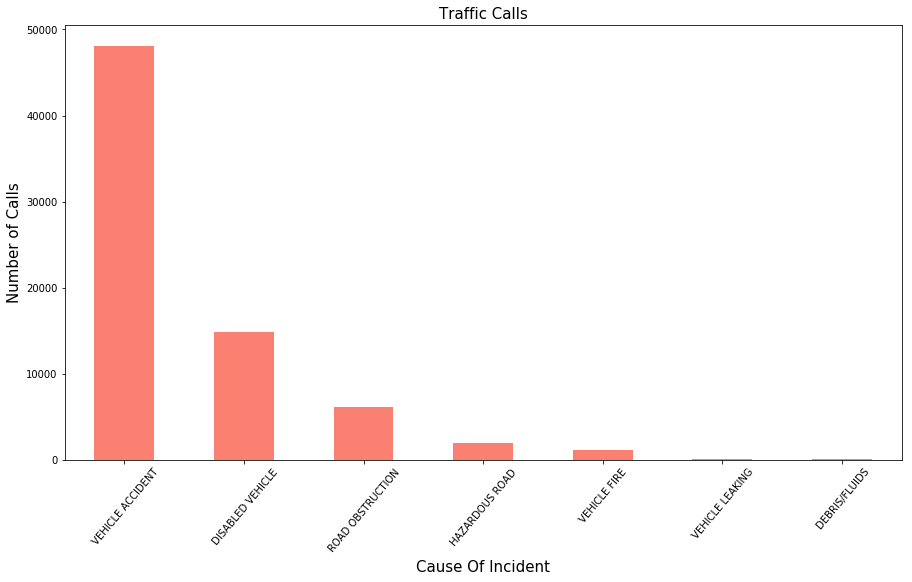

In [14]:
calls[calls.call_type == "Traffic"].call_detail.value_counts().plot(kind = "bar", figsize = (15,8), color = "salmon", rot = 50)
plt.xlabel("Cause Of Incident", size =15);
plt.ylabel("Number of Calls", size = 15);
plt.title("Traffic Calls", size = 15);

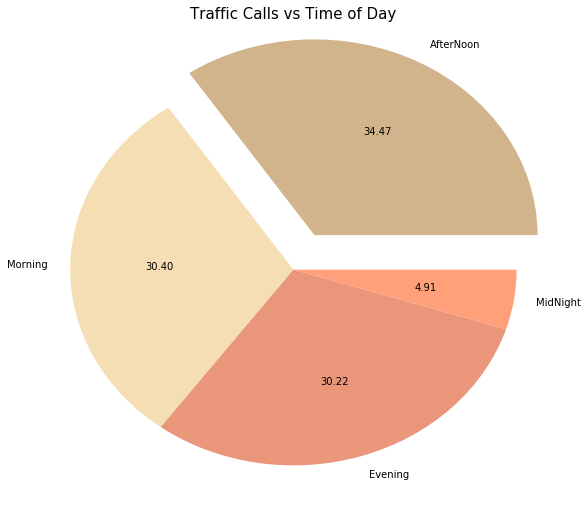

In [15]:
calls[calls.call_type == "Traffic"].hour_type.value_counts().plot(figsize = (10,9),kind = "pie",autopct = "%.2f", colors = ["tan", "wheat","darksalmon","lightsalmon"],
                                                             explode = [0.2,0,0,0])

plt.title("Traffic Calls vs Time of Day", size = 15)
plt.ylabel("")

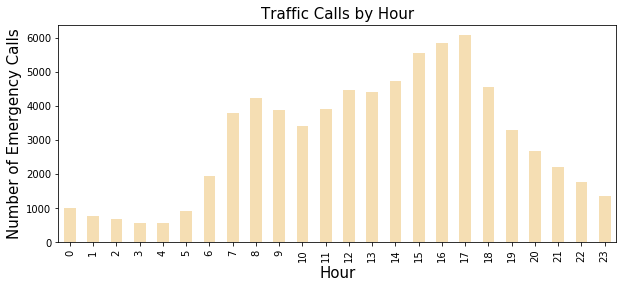

In [16]:
calls[calls.call_type=="Traffic"].Hour.value_counts().sort_index().plot(kind = "bar", figsize = (10,4), color = "wheat")
plt.xlabel("Hour", size = 15);
plt.ylabel("Number of Emergency Calls", size = 15);
plt.title("Traffic Calls by Hour", size = 15);

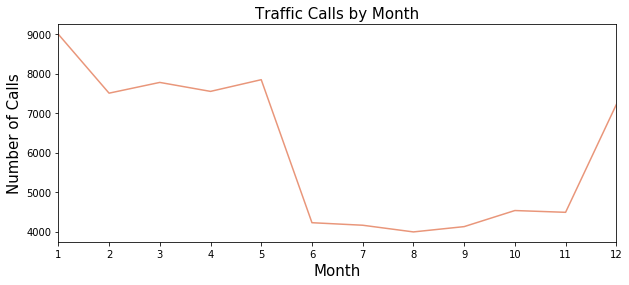

In [17]:
calls[calls.call_type == "Traffic"].Month.value_counts().sort_index().plot(kind = "line", color = "darksalmon", figsize =(10,4))
plt.xticks(range(1,13,1));
plt.title("Traffic Calls by Month", size = 15);
plt.xlabel("Month", size = 15);
plt.ylabel("Number of Calls", size = 15);

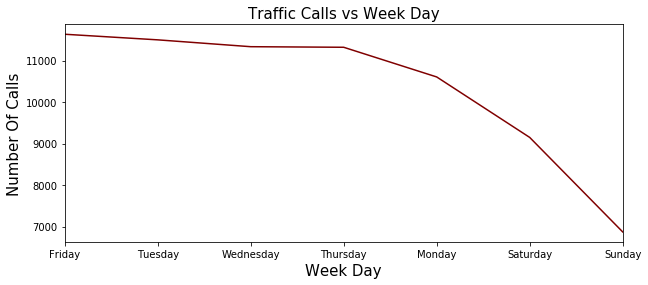

In [18]:
calls[calls.call_type == "Traffic"].weekday.value_counts().plot(kind = "line", color = "maroon", figsize = (10,4));
plt.title("Traffic Calls vs Week Day", size = 15);
plt.xlabel("Week Day", size = 15);
plt.ylabel("Number Of Calls", size = 15);

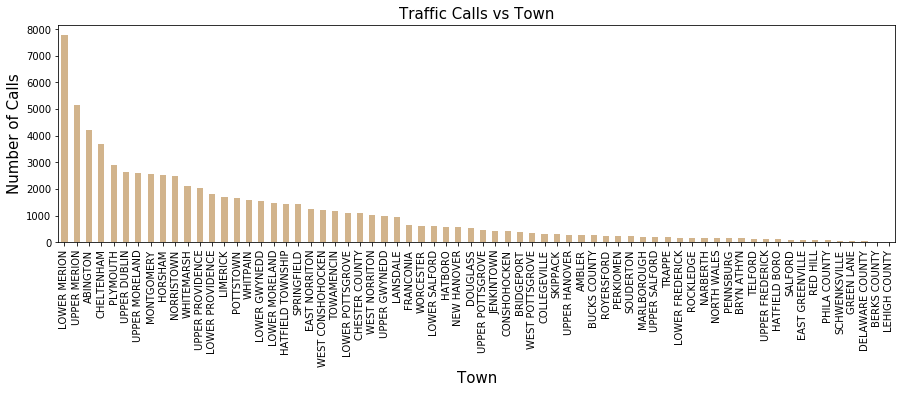

In [19]:
calls[calls.call_type =="Traffic"].groupby("twp").count().e.sort_values(ascending= False).plot(kind = "bar", figsize= (15,4), color = "tan");
plt.title("Traffic Calls vs Town", size = 15);
plt.xlabel("Town", size = 15);
plt.ylabel("Number of Calls", size = 15);

### Fire Calls

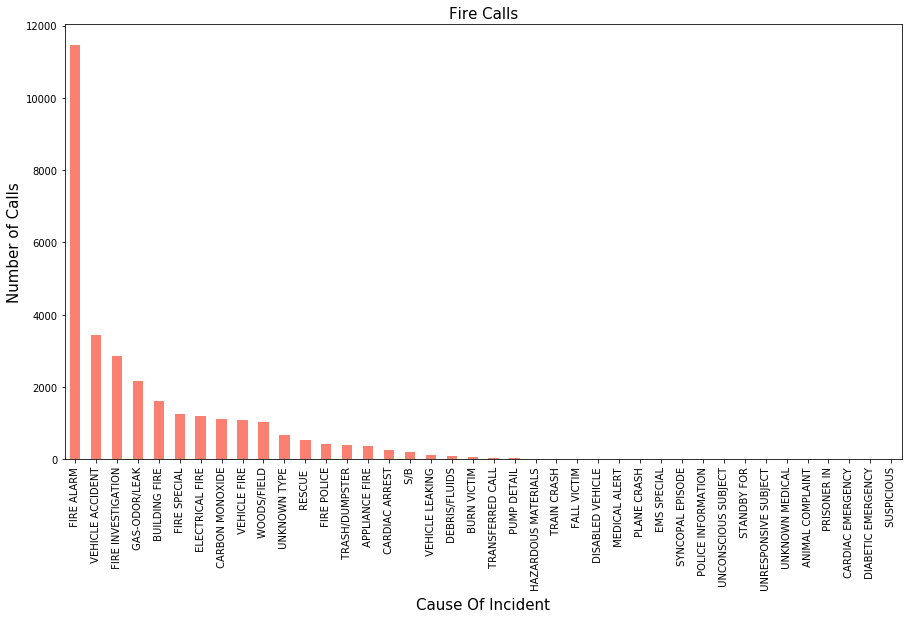

In [20]:
calls[calls.call_type == "Fire"].call_detail.value_counts().plot(kind = "bar", figsize = (15,8), color = "salmon")
plt.xlabel("Cause Of Incident", size =15);
plt.ylabel("Number of Calls", size = 15);
plt.title("Fire Calls", size = 15);

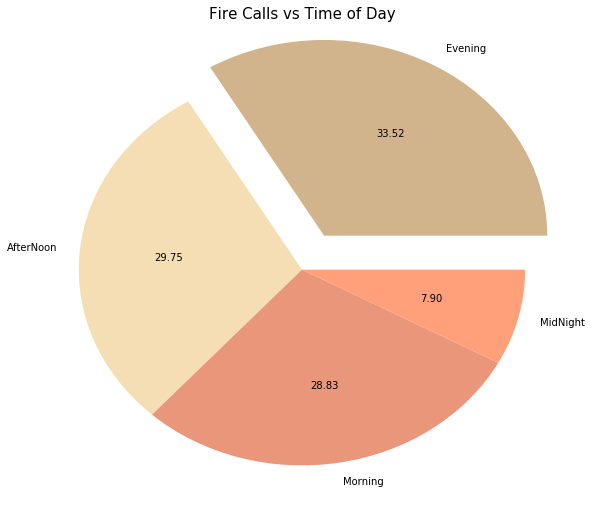

In [21]:
calls[calls.call_type == "Fire"].hour_type.value_counts().plot(figsize = (10,9),kind = "pie",autopct = "%.2f", colors = ["tan", "wheat","darksalmon","lightsalmon"],
                                                             explode = [0.2,0,0,0])

plt.title("Fire Calls vs Time of Day", size = 15)
plt.ylabel("")

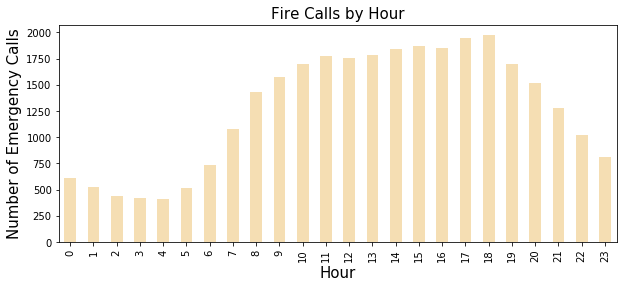

In [22]:
calls[calls.call_type=="Fire"].Hour.value_counts().sort_index().plot(kind = "bar", figsize = (10,4), color = "wheat")
plt.xlabel("Hour", size = 15);
plt.ylabel("Number of Emergency Calls", size = 15);
plt.title("Fire Calls by Hour", size = 15);

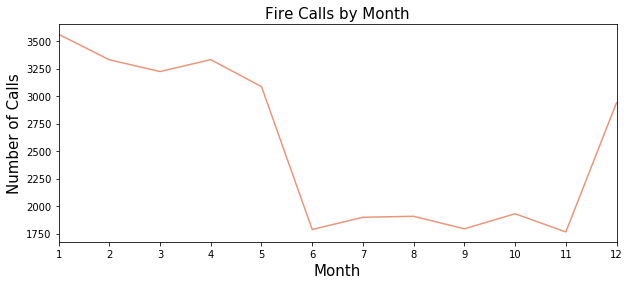

In [23]:
calls[calls.call_type == "Fire"].Month.value_counts().sort_index().plot(kind = "line", color = "darksalmon", figsize =(10,4))
plt.xticks(range(1,13,1));
plt.title("Fire Calls by Month", size = 15);
plt.xlabel("Month", size = 15);
plt.ylabel("Number of Calls", size = 15);

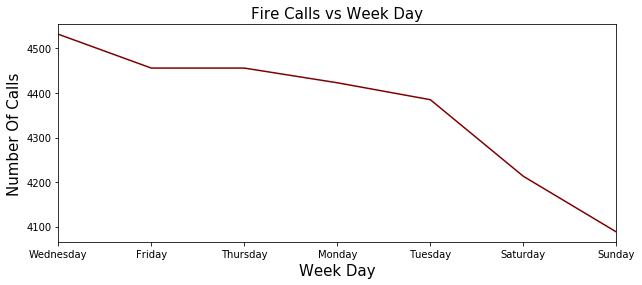

In [24]:
calls[calls.call_type == "Fire"].weekday.value_counts().plot(kind = "line", color = "maroon", figsize = (10,4));
plt.title("Fire Calls vs Week Day", size = 15);
plt.xlabel("Week Day", size = 15);
plt.ylabel("Number Of Calls", size = 15);

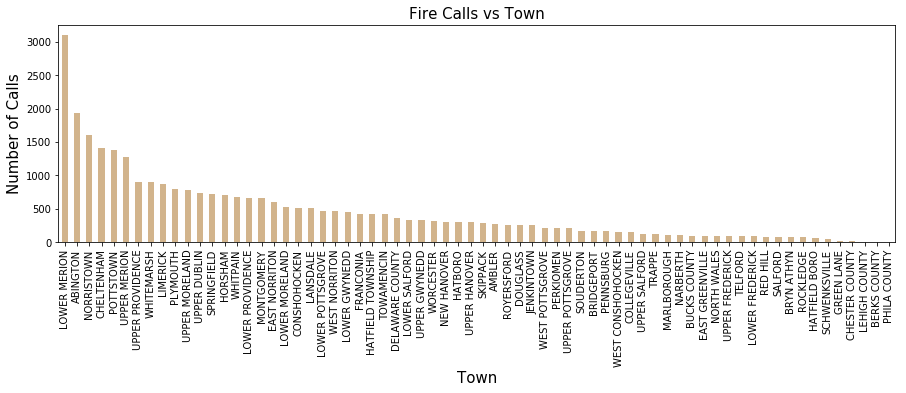

In [25]:
calls[calls.call_type =="Fire"].groupby("twp").count().e.sort_values(ascending= False).plot(kind = "bar", figsize= (15,4), color = "tan");
plt.title("Fire Calls vs Town", size = 15);
plt.xlabel("Town", size = 15);
plt.ylabel("Number of Calls", size = 15);

### Overall Analysis

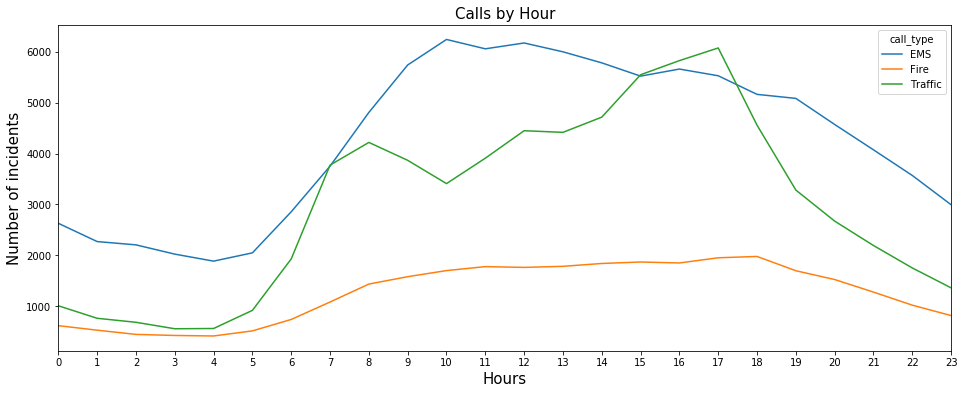

In [26]:
calls.groupby("Hour").call_type.value_counts().unstack().plot(kind = "line",figsize = (16,6))
plt.title("Calls by Hour",size = 15)
plt.ylabel("Number of incidents",size = 15)
plt.xlabel("Hours", size = 15)
plt.xticks(range(0,24,1));

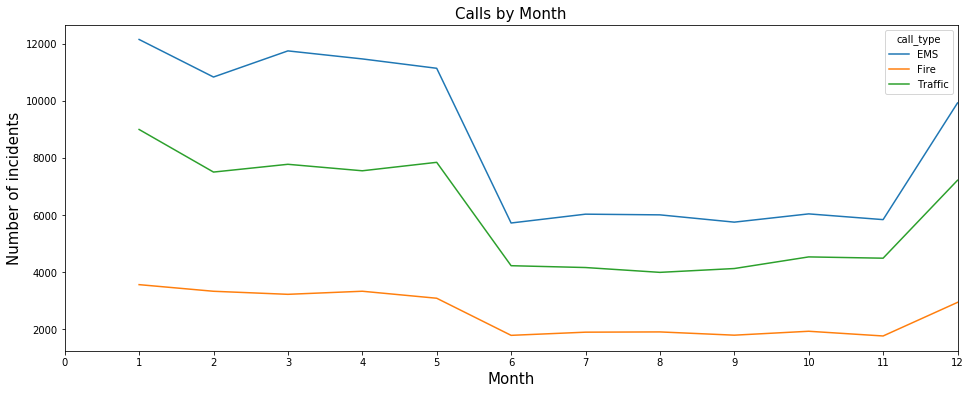

In [27]:
calls.groupby("Month").call_type.value_counts().unstack().plot(kind = "line",figsize = (16,6))
plt.title("Calls by Month",size = 15)
plt.ylabel("Number of incidents",size = 15)
plt.xlabel("Month", size = 15)
plt.xticks(range(0,13,1));

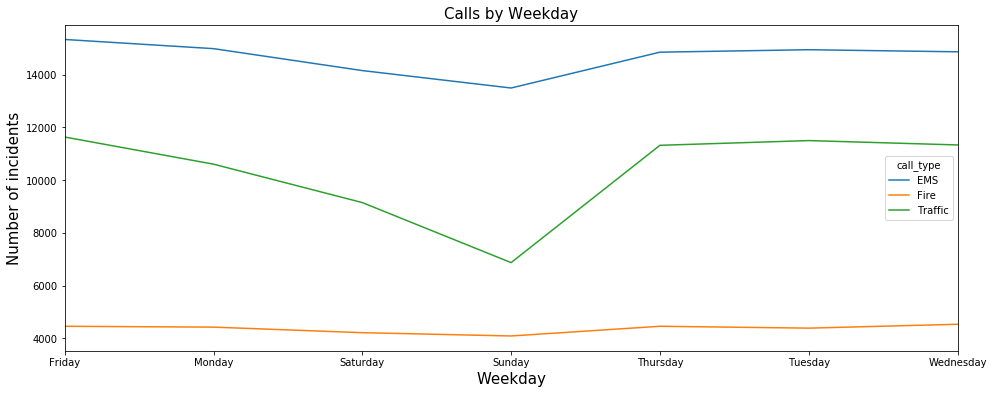

In [28]:
calls.groupby("weekday").call_type.value_counts().unstack().plot(kind = "line",figsize = (16,6))
plt.title("Calls by Weekday",size = 15)
plt.ylabel("Number of incidents",size = 15)
plt.xlabel("Weekday", size = 15)
# plt.xticks(range(0,24,1));

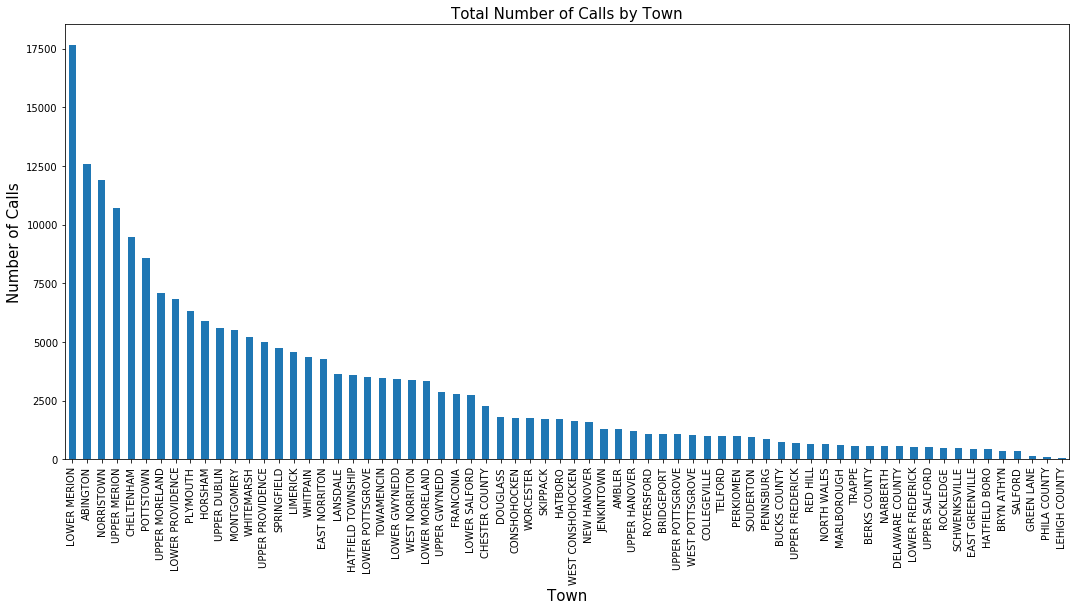

In [29]:
calls.groupby("twp").call_type.value_counts().unstack().sum(1).sort_values(ascending = False).plot(kind = "bar",figsize = (18,8))
# pct_town_details = town_details.div(town_details.sum(0),1)
# pct_town_details.sort_values("EMS",ascending = False).plot(kind = "bar",rot = 90,figsize = (18,8),color = ["red","orange","green"])
plt.xlabel("Town", size = 15);
plt.title("Total Number of Calls by Town", size = 15)
plt.ylabel("Number of Calls", size = 15)

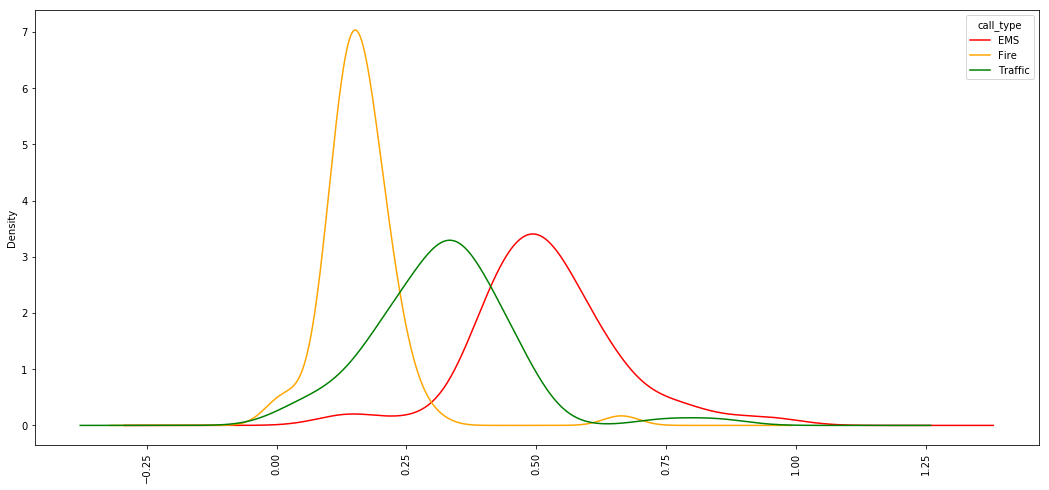

In [47]:
town_details = calls.groupby("twp").call_type.value_counts().unstack()
pct_town_details = town_details.div(town_details.sum(1),0)
pct_town_details.plot(kind = "kde",rot = 90,figsize = (18,8),color = ["red","orange","green"])
# plt.xlabel("Town", size = 15);
# plt.title("Proportion of Call type by Town", size = 15)
# plt.ylabel("Number of Calls", size = 15)